## Amostragem

A amostragem é o método responsável por retirar uma parte da população, chamada da amostra, que permita tirarmos conclusões estatísticas da população, sem termos que investigar a população inteira



In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('census.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Amostragem aleatória simples

A amostragem aleatória simples é quando todos os indíviduos da população tem a mesma chance de serem escolhidos aleatoriamente

In [5]:
df_amostra_aleatoria_simples = df.sample(n = 100, random_state = 1)

In [6]:
df_amostra_aleatoria_simples.shape

(100, 15)

In [7]:
df_amostra_aleatoria_simples.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
def amostragem_aleatoria_simples(dataset, n_amostras):
    return dataset.sample(n = n_amostras)

In [9]:
df_amostra_aleatoria_simples = amostragem_aleatoria_simples(df, 100)

### Amostragem sistemática

A amostragem sistemática ocorre utilizando um intervalo sistemático de amostragem. Defini-se o número de amostras que desejamos. A partir disso define-se o intervalo de amostragem. Sendo assim, a cada intervalo de amostragem passado, seleciona-se um indíviduo da população

In [10]:
n_amostras = 100 # Nº de amostras a serem retiradas do dataset

intervalo_amostra = len(df) // n_amostras # Cálculo do intervalo sistemático de amostragem
print(intervalo_amostra)

325


In [11]:
random.seed(1) # Colocando a seed para ter replicabilidade
random.randint(0,325) # Gerando o ponto da primeira amostra

68

In [12]:
np.arange(68, len(df), intervalo_amostra)

array([   68,   393,   718,  1043,  1368,  1693,  2018,  2343,  2668,
        2993,  3318,  3643,  3968,  4293,  4618,  4943,  5268,  5593,
        5918,  6243,  6568,  6893,  7218,  7543,  7868,  8193,  8518,
        8843,  9168,  9493,  9818, 10143, 10468, 10793, 11118, 11443,
       11768, 12093, 12418, 12743, 13068, 13393, 13718, 14043, 14368,
       14693, 15018, 15343, 15668, 15993, 16318, 16643, 16968, 17293,
       17618, 17943, 18268, 18593, 18918, 19243, 19568, 19893, 20218,
       20543, 20868, 21193, 21518, 21843, 22168, 22493, 22818, 23143,
       23468, 23793, 24118, 24443, 24768, 25093, 25418, 25743, 26068,
       26393, 26718, 27043, 27368, 27693, 28018, 28343, 28668, 28993,
       29318, 29643, 29968, 30293, 30618, 30943, 31268, 31593, 31918,
       32243])

In [13]:
def amostragem_sistematica(dataset, n_amostras):
    intervalo = dataset.shape[0] // n_amostras
    random.seed(1)
    primeiro_ponto = random.randint(0, intervalo)
    indices = np.arange(primeiro_ponto, dataset.shape[0], intervalo)
    amostra_sistematica = dataset.iloc[indices]
    return amostra_sistematica

In [14]:
df_amostra_sistematica = amostragem_sistematica(df, 100)
df_amostra_sistematica.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
68,49,Self-emp-inc,191681,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
393,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
718,22,Private,214399,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K
1043,44,Private,167005,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K


### Amostragem por grupos

A amostragem por grupos divide a população por grupos e seleciona um desses grupos, conhecido como clusters, como amostra

In [15]:
n_grupos = 10

df.shape[0] / n_grupos

3256.1

In [16]:
grupos = []
id_grupo = 0
contagem = 0

for _ in df.iterrows():
    grupos.append(id_grupo)
    contagem +=1
    if contagem > 3256:
        contagem = 0
        id_grupo += 1

In [17]:
np.unique(grupos, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([3257, 3257, 3257, 3257, 3257, 3257, 3257, 3257, 3257, 3248],
       dtype=int64))

In [18]:
random.randint(0,9)

9

In [19]:
def amostragem_agrupamento(dataset, n_grupos):
    intervalo = dataset.shape[0] / n_grupos
    
    grupos = []
    id_grupo = 0
    contagem = 0
    for _ in dataset.iterrows():
        grupos.append(id_grupo)
        contagem +=1
        if contagem > intervalo:
            contagem = 0
            id_grupo += 1
            
    dataset['grupo'] = grupos
    
    random.seed(1)
    grupo_selecionado = random.randint(0, n_grupos)
    
    return dataset[dataset['grupo'] == grupo_selecionado]

In [20]:
df_amostra_agrupamento = amostragem_agrupamento(df, 100)

### Amostragem estratificada

A amostragem nós realizamos uma amostragem de acordo com as proporções da população. Sendo assim, a amostra mostra uma proporção de um ou mais atributos similar ao da população

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
df['income'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [23]:
split = StratifiedShuffleSplit(test_size=100/df.shape[0])

for x, y in split.split(df, df['income']):    
    df_y = df.iloc[y] # Vai ser o df de amostra, com 100 elementos da base, de acordo com o parâmetro test_size
    df_x = df.iloc[x] # Df com todos os dados da base, retirados os que foram pegos para amostra

In [24]:
df_y
df_y.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,grupo
25939,18,Private,184016,HS-grad,9,Married-civ-spouse,Priv-house-serv,Not-in-family,White,Female,3103,0,40,United-States,<=50K,79
19164,42,Private,332401,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K,58
2246,58,Self-emp-not-inc,164065,Masters,14,Divorced,Sales,Not-in-family,White,Male,0,0,18,United-States,<=50K,6
25617,41,Local-gov,112797,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,60,United-States,<=50K,78
13350,32,Private,187901,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,23,United-States,<=50K,40


In [25]:
# Comparando a porcentagem do income da amostra estratificado com a população
print(df_y['income'].value_counts(normalize=True))
print(df['income'].value_counts(normalize=True))

 <=50K    0.76
 >50K     0.24
Name: income, dtype: float64
 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64


In [26]:
def amostragem_estratificada(dataset, percentual, atributo):
    split = StratifiedShuffleSplit(test_size=percentual, random_state=1)

    for _, y in split.split(dataset, dataset[atributo]):    
        df_y = dataset.iloc[y] # Vai ser o df de amostra, com 100 elementos da base, de acordo com o parâmetro test_size
        
    return df_y    

In [27]:
df_amostra_estratificada = amostragem_estratificada(df, 100/df.shape[0], 'income')

### Amostra de reservatório

Utilizado em um data stream de itens com tamanho desconhecido que pode ser acessado somente uma vez. É uma amostragem que sortea um item do stream, porém, cada item deve possuir a mesma probabilidade de seleção

In [28]:
def amostragem_reservatório(dataset, n_amostras):
    stream = list(dataset.index) # Lista para guardar o índices do dataframe  
        
    reservatorio = [0] * n_amostras # inicializando o reservatório
    
    for i in range(n_amostras):
        reservatorio[i] = stream[i] # preenchendo o reservatório com os primeiro n_amostras itens 
        
    i = 0
    tamanho = dataset.shape[0]       
    while i < tamanho:
        j = random.randrange(i + 1) # simulando a stream
        if j < n_amostras: # se j for menor que o n_amostras definido ocorre a troca do item no reservatório, na posição j do reservatório pelo dado no índice i do dataset
            reservatorio[j] = stream[i] 
        i += 1
    
    return dataset.iloc[reservatorio]

In [29]:
df_amostragem_reservatorio = amostragem_reservatório(df, 100)
df_amostragem_reservatorio.shape

(100, 16)

In [30]:
df_amostragem_reservatorio.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,grupo
29502,25,Local-gov,476599,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K,90
21610,48,Private,233511,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,>50K,66
30569,75,?,114204,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,13,United-States,<=50K,93
28449,61,Private,227468,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K,87
8704,70,Private,102610,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,80,United-States,<=50K,26


### Comparativo dos resultados 

In [31]:
df['age'].mean()

38.58164675532078

In [32]:
df_amostra_aleatoria_simples['age'].mean()

36.82

In [33]:
df_amostra_sistematica['age'].mean()

37.57

In [34]:
df_amostra_agrupamento['age'].mean()

39.23312883435583

In [35]:
df_amostra_estratificada['age'].mean()

36.9

In [36]:
df_amostragem_reservatorio['age'].mean()

37.59

### Exercício de Amostragem

O objetivo deste exercício é utilizar outra base de dados para testar as amostragens e comparar os resultados

* Faça o download e carregue a base de dados credit_data.csv, que possui informações sobre empréstimos (se o cliente pagará ou não pagará o empréstimo)
* Teste cada uma das técnicas de amostragem, selecionando 1000 registros
* Para a amostragem estratificada, utilize o atributo c#default para separar as categorias
* No final, faça o comparativo da média utilizando os atributos age, income e loan


In [37]:
credit_data = pd.read_csv('credit_data.csv')

In [38]:
credit_data.shape

(2000, 5)

In [39]:
credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [40]:
credit_data_am_simples = amostragem_aleatoria_simples(credit_data, 1000)
credit_data_am_sistematica = amostragem_sistematica(credit_data, 1000)
credit_data_am_grupos = amostragem_agrupamento(credit_data, round(credit_data.shape[0]/1000))
credit_data_am_estratificada = amostragem_estratificada(credit_data, 1000/credit_data.shape[0], 'c#default')
credit_data_am_reservatório = amostragem_reservatório(credit_data, 1000)

In [41]:
all_datasets = [credit_data, credit_data_am_simples, credit_data_am_sistematica, credit_data_am_grupos, credit_data_am_estratificada, credit_data_am_reservatório]
nomes = ['População', 'Amostragem Aleatória Simples', 'Amostragem sistemática','Amostragem por grupos', 'Amostragem estratificada', 'Amostra de reservatório']

In [42]:
for df, i in zip(all_datasets, nomes):    
    idade = df['age'].mean()
    renda = df['income'].mean()
    divida = df['loan'].mean()
    print(f'{i}:\n\nMédia de idade: {idade}\nMédia de renda: {renda}\nMédia da dívida: {divida}\n' )

População:

Média de idade: 40.80755937840458
Média de renda: 45331.60001779333
Média da dívida: 4444.369694688262

Amostragem Aleatória Simples:

Média de idade: 41.320841168814
Média de renda: 45299.416997190594
Média da dívida: 4324.905292791757

Amostragem sistemática:

Média de idade: 40.91117381141754
Média de renda: 45691.49875066951
Média da dívida: 4506.787976426329

Amostragem por grupos:

Média de idade: 41.0432231120503
Média de renda: 44846.74925986142
Média da dívida: 4390.1614937442055

Amostragem estratificada:

Média de idade: 40.53363707173919
Média de renda: 45101.36675026739
Média da dívida: 4423.744651094196

Amostra de reservatório:

Média de idade: 41.25489485508821
Média de renda: 45000.68883746865
Média da dívida: 4443.476973794102



## Classificação com dados desbalanceados

### Naïve Bayes

O foco desse estudo não é a classificação, mas vamos utilizar algoritmos de classificação. Esses algoritmos conseguem classificar novos pontos de dados a partir das informações de um dataset histórico. Vamos ver como as técnicas de subamostragem e sobreamostragem impactam na qualidade dessa previsão

In [43]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
 5   grupo       2000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 93.9 KB


In [44]:
credit_data.head() 

,i#clientid,income,age,loan,c#default,grupo
0,1,66155.925095,59.017015,8106.532131,0,0
1,2,34415.153966,48.117153,6564.745018,0,0
2,3,57317.170063,63.108049,8020.953296,0,0
3,4,42709.534201,45.751972,6103.642260,0,0
4,5,66952.688845,18.584336,8770.099235,1,0


In [45]:
credit_data = credit_data.dropna(axis = 0) #Retirando linhas com o valor idade vazio

In [46]:
credit_data.shape

(1997, 6)

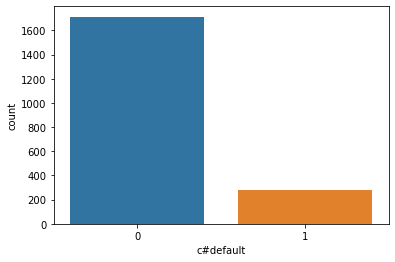

In [47]:
sns.countplot(x = 'c#default', data = credit_data);

Base de dados desbalanceado! A maioria das pessoas nessa base de dados pagam o empréstimo (Classe 0) 

In [48]:
credit_data['c#default'].value_counts(normalize = True)

0    0.858287
1    0.141713
Name: c#default, dtype: float64

In [49]:
X = credit_data.iloc[:, 1:4]

In [50]:
y = credit_data.iloc[:, 4].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [53]:
print(f'Proporção da base de dados de teste:\n{pd.Series(y_test).value_counts(normalize=True)}\n\nProporção da base de dados de treinamento:\n{pd.Series(y_train).value_counts(normalize = True)}')

Proporção da base de dados de teste:
0    0.8575
1    0.1425
dtype: float64

Proporção da base de dados de treinamento:
0    0.858485
1    0.141515
dtype: float64


In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
classificador = GaussianNB()
classificador.fit(X_train, y_train)

GaussianNB()

In [56]:
previsoes = classificador.predict(X_test)

In [57]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [58]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(previsoes, y_test)

0.925

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(previsoes, y_test)
cm

array([[337,  24],
       [  6,  33]], dtype=int64)

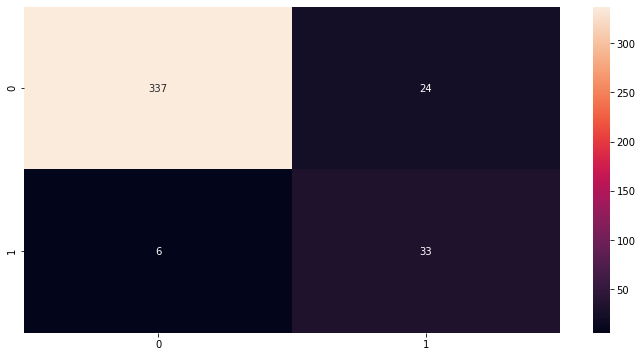

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot = True, fmt = '.0f');

In [64]:
from sklearn.metrics import precision_score
precision_score(y_test, previsoes) # Percentual de acerto para pessoas que não pagam o empréstimo

0.8461538461538461

Por mais que o accuracy, que mede o total de acertos do modelo esteja alto, a sua precisão deixa a desejar. A precisão mostra o percentual de acerto para pessoas que não pagam o empréstimo, sendo assim uma métrica mais adequada para a avaliação do modelo. Além disso, o accuracy alto se deve em parte pela base de dados desbalanceada. Vamos ver como a subamostragem a sobreamostragem podem mudar isso

### Subamostragem

Com a subamostragem selecionamos itens da classe majoritária, diminuindo a quantidade de registros da classe majoritária, de forma a se aproximar da classe minoritária.

In [65]:
from imblearn.under_sampling import TomekLinks

In [66]:
tl = TomekLinks(sampling_strategy= 'majority')
X_under, y_under = tl.fit_resample(X, y)

In [67]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [68]:
print(f'Proporção da base de dados após realizarmos Subamostragem por Tomek Links:\n{pd.Series(y).value_counts(normalize = True)}\
       \n\nProporção da base de dados antes de realizarmos a Subamostragem por Tomek Links treinamento:\n{pd.Series(y_under).value_counts(normalize = True) }')

Proporção da base de dados após realizarmos Subamostragem por Tomek Links:
0    0.858287
1    0.141713
dtype: float64       

Proporção da base de dados antes de realizarmos a Subamostragem por Tomek Links treinamento:
0    0.850817
1    0.149183
dtype: float64


In [69]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under, random_state=1)

In [70]:
modelo_u = GaussianNB()
modelo_u.fit(X_train_u, y_train_u)
previsoes_u = modelo_u.predict(X_test_u)
accuracy_score(y_test_u, previsoes_u)

0.9157894736842105

In [71]:
cm_u = confusion_matrix(previsoes_u, y_test_u)
cm_u

array([[313,  22],
       [ 10,  35]], dtype=int64)

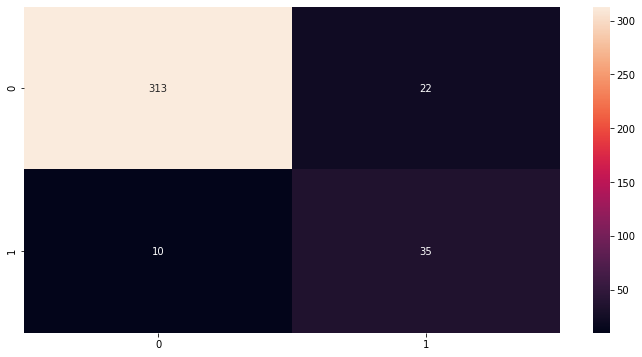

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(cm_u, annot = True, fmt = '.0f');

In [73]:
precision_score(y_test_u, previsoes_u)

0.7777777777777778

### Sobreamostragem

Com a sobreamostragem geramos amostras sintéticas, a partir de algoritmos, da classe minoritária de forma a aproximar a quantidade de registros a classe majoritária.

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [76]:
X_over.shape

(3428, 3)

In [77]:
print(f'Proporção da base de dados antes de realizarmos Sobreamostragem por SMOTE:\n{pd.Series(y).value_counts(normalize = False)}\
       \n\nProporção da base de dados após realizarmos a Sobreamostragem por SMOTE:\n{pd.Series(y_over).value_counts(normalize = False) }')

Proporção da base de dados antes de realizarmos Sobreamostragem por SMOTE:
0    1714
1     283
dtype: int64       

Proporção da base de dados após realizarmos a Sobreamostragem por SMOTE:
0    1714
1    1714
dtype: int64


In [78]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=1)

In [79]:
modelo_o = GaussianNB()
modelo_o.fit(X_train_o, y_train_o)
previsoes_o = modelo_o.predict(X_test_o)
accuracy_score(y_test_o, previsoes_o)

0.9183673469387755

In [80]:
cm_o = confusion_matrix(previsoes_o, y_test_o)
cm_o

array([[306,  19],
       [ 37, 324]], dtype=int64)

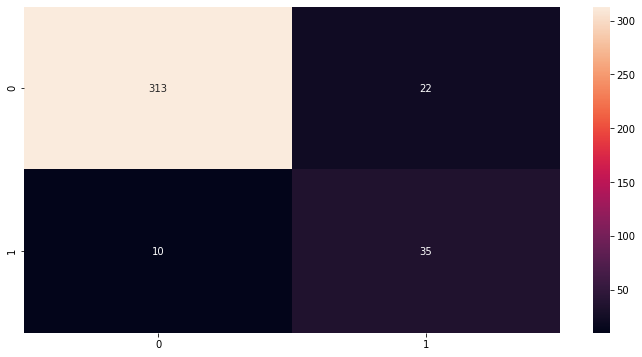

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(cm_u, annot = True, fmt = '.0f');

In [82]:
precision_score(y_test_o, previsoes_o)

0.8975069252077562

### Exercício de Subamostragem e Sobreamostragem

O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

* Carregue a base de dados csv_result-ebay_confianca_completo.csv, que é uma base de dados que utilizei no meu pós-doutorado para prever confiança de usuários baseado em traços de personalidade extraídos de textos
* A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim
* Utilize o algoritmo Random Forest e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão. 

In [83]:
confianca_ebay = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [84]:
confianca_ebay.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [85]:
confianca_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 2 to 5807
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   feedbacks                5806 non-null   int64  
 1   reviews                  5806 non-null   int64  
 2   blacklist                5806 non-null   object 
 3   mextraversion            5806 non-null   float64
 4   cextraversion            5806 non-null   float64
 5   sextraversion            5806 non-null   int64  
 6   mneuroticism             5806 non-null   float64
 7   cneuroticism             5806 non-null   float64
 8   sneuroticism             5806 non-null   int64  
 9   mconscientiousness       5806 non-null   float64
 10  cconscientiousness       5806 non-null   float64
 11  sconscientiousness       5806 non-null   int64  
 12  magreeableness           5806 non-null   float64
 13  cagreeableness           5806 non-null   float64
 14  sagreeableness          

In [86]:
confianca_ebay['blacklist'].value_counts()

N    5022
B     784
Name: blacklist, dtype: int64

In [87]:
confianca_ebay['blacklist'] = confianca_ebay['blacklist'] == 'S' #transformando a coluna categórica em strings numa coluna booleana

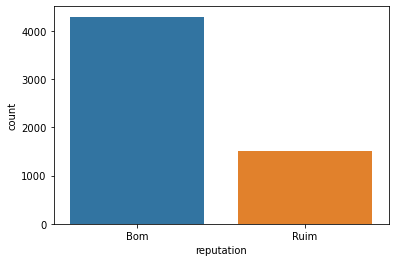

In [88]:
sns.countplot(x = 'reputation', data = confianca_ebay);

In [89]:
y_ebay = confianca_ebay['reputation'].values
print(y_ebay.shape)

(5806,)


In [90]:
X_ebay = confianca_ebay[[col for col in confianca_ebay.columns if col != 'reputation']]
X_ebay.shape

(5806, 74)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
def comparador(X, y, modelo_teste):
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    modelo = modelo_teste
    modelo.fit(X_train, y_train)
    previsoes = modelo.predict(X_test)
    print('Base de dados original:')
    print('accuracy score: ', accuracy_score(y_test, previsoes))   
    
    tl = TomekLinks(sampling_strategy= 'majority')
    X_under, y_under = tl.fit_resample(X, y)
    X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under, random_state=1)
    modelo_u = modelo_teste
    modelo_u.fit(X_train_u, y_train_u)
    previsoes_u = modelo_u.predict(X_test_u)
    print('\nBase de dados com subamostragem por Tomek Links:')
    print('accuracy score: ', accuracy_score(y_test_u, previsoes_u))
        
    smote = SMOTE(sampling_strategy='minority', random_state=1)
    X_over, y_over = smote.fit_resample(X, y)
    X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=1)
    modelo_o = modelo_teste
    modelo_o.fit(X_train_o, y_train_o)
    previsoes_o = modelo_o.predict(X_test_o)
    print('\nBase de dados com sobreamostragem por Smote:')
    print('accuracy score: ', accuracy_score(y_test_o, previsoes_o))    

In [93]:
modelo = RandomForestClassifier()

In [94]:
comparador(X_ebay,y_ebay, modelo)

Base de dados original:
accuracy score:  0.7452667814113597

Base de dados com subamostragem por Tomek Links:
accuracy score:  0.7306273062730627

Base de dados com sobreamostragem por Smote:
accuracy score:  0.833139534883721
